In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno

In [11]:
original = sns.load_dataset('penguins')
original.dropna(thresh=5,inplace=True)

In [3]:
df = pd.read_parquet('missing.parquet')

<Figure size 1000x600 with 0 Axes>

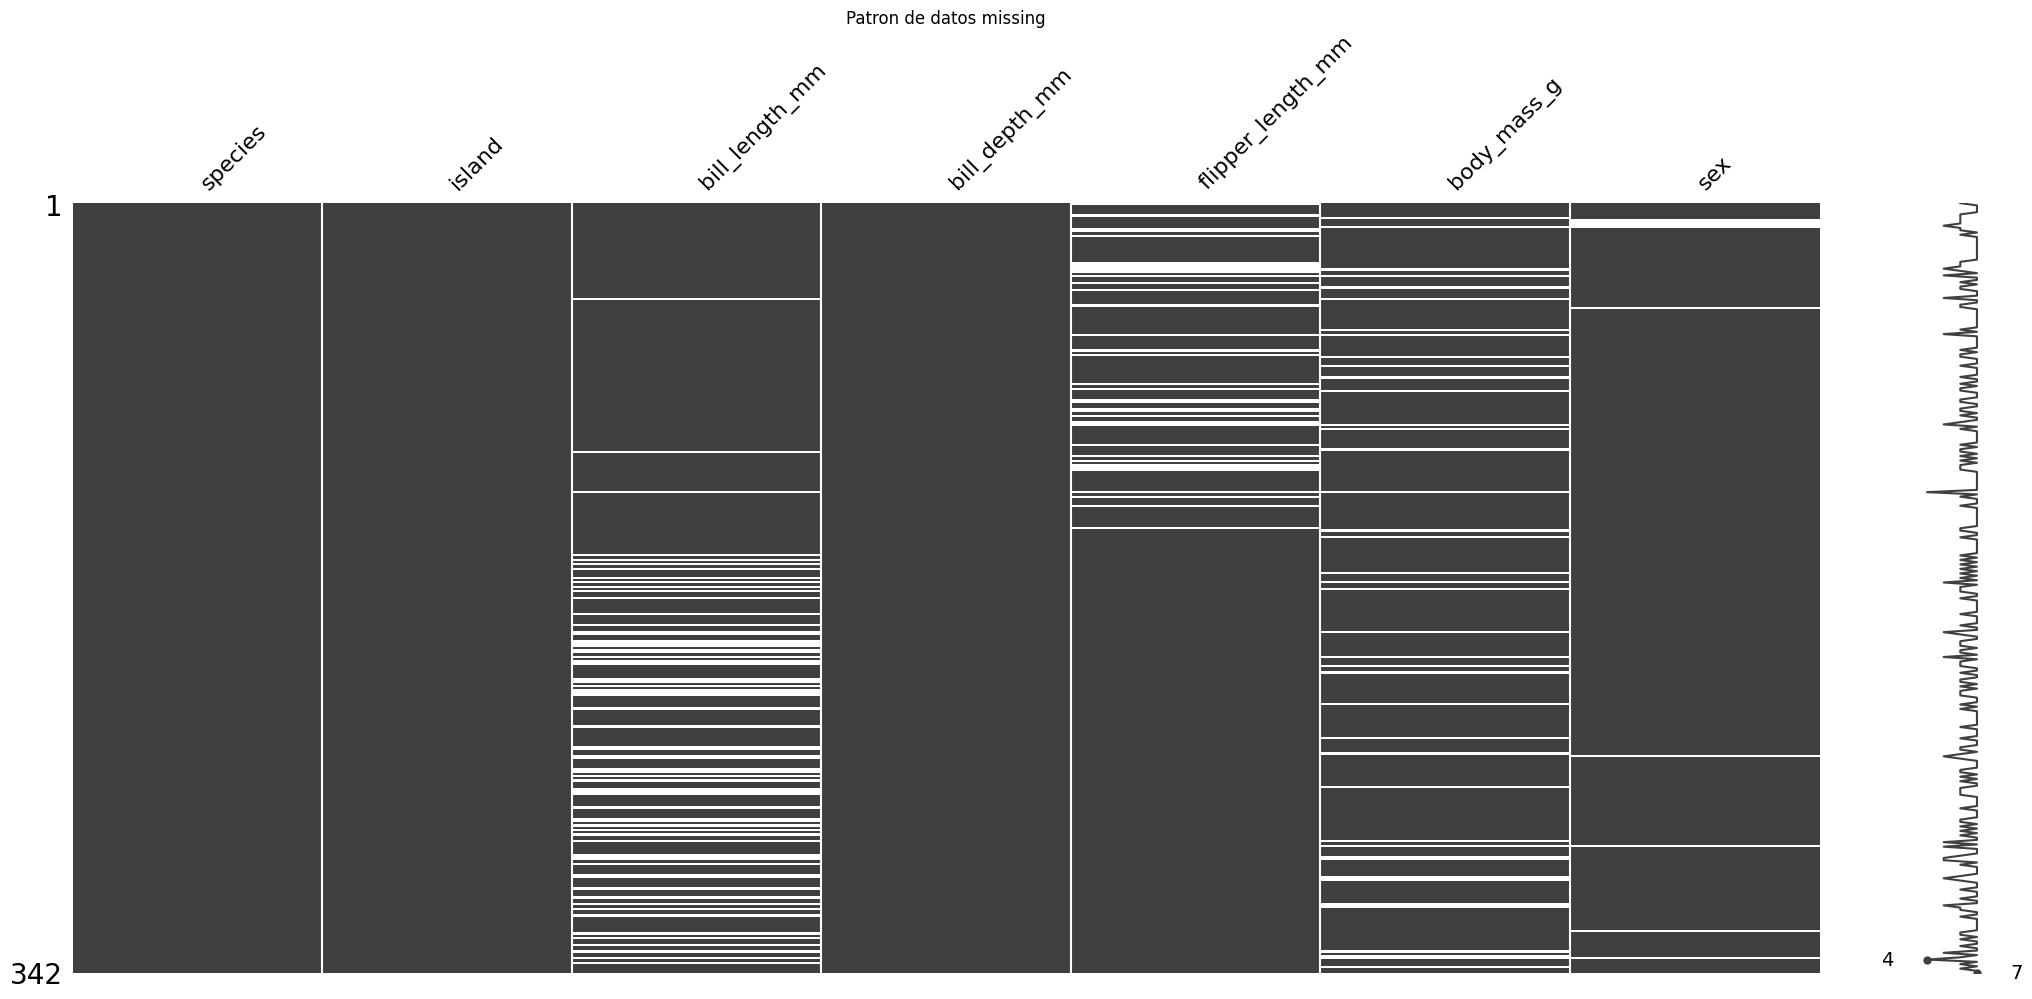

In [6]:
plt.figure(figsize=(10,6))
msno.matrix(df)
plt.title('Patron de datos missing')
plt.show();

<Figure size 1000x600 with 0 Axes>

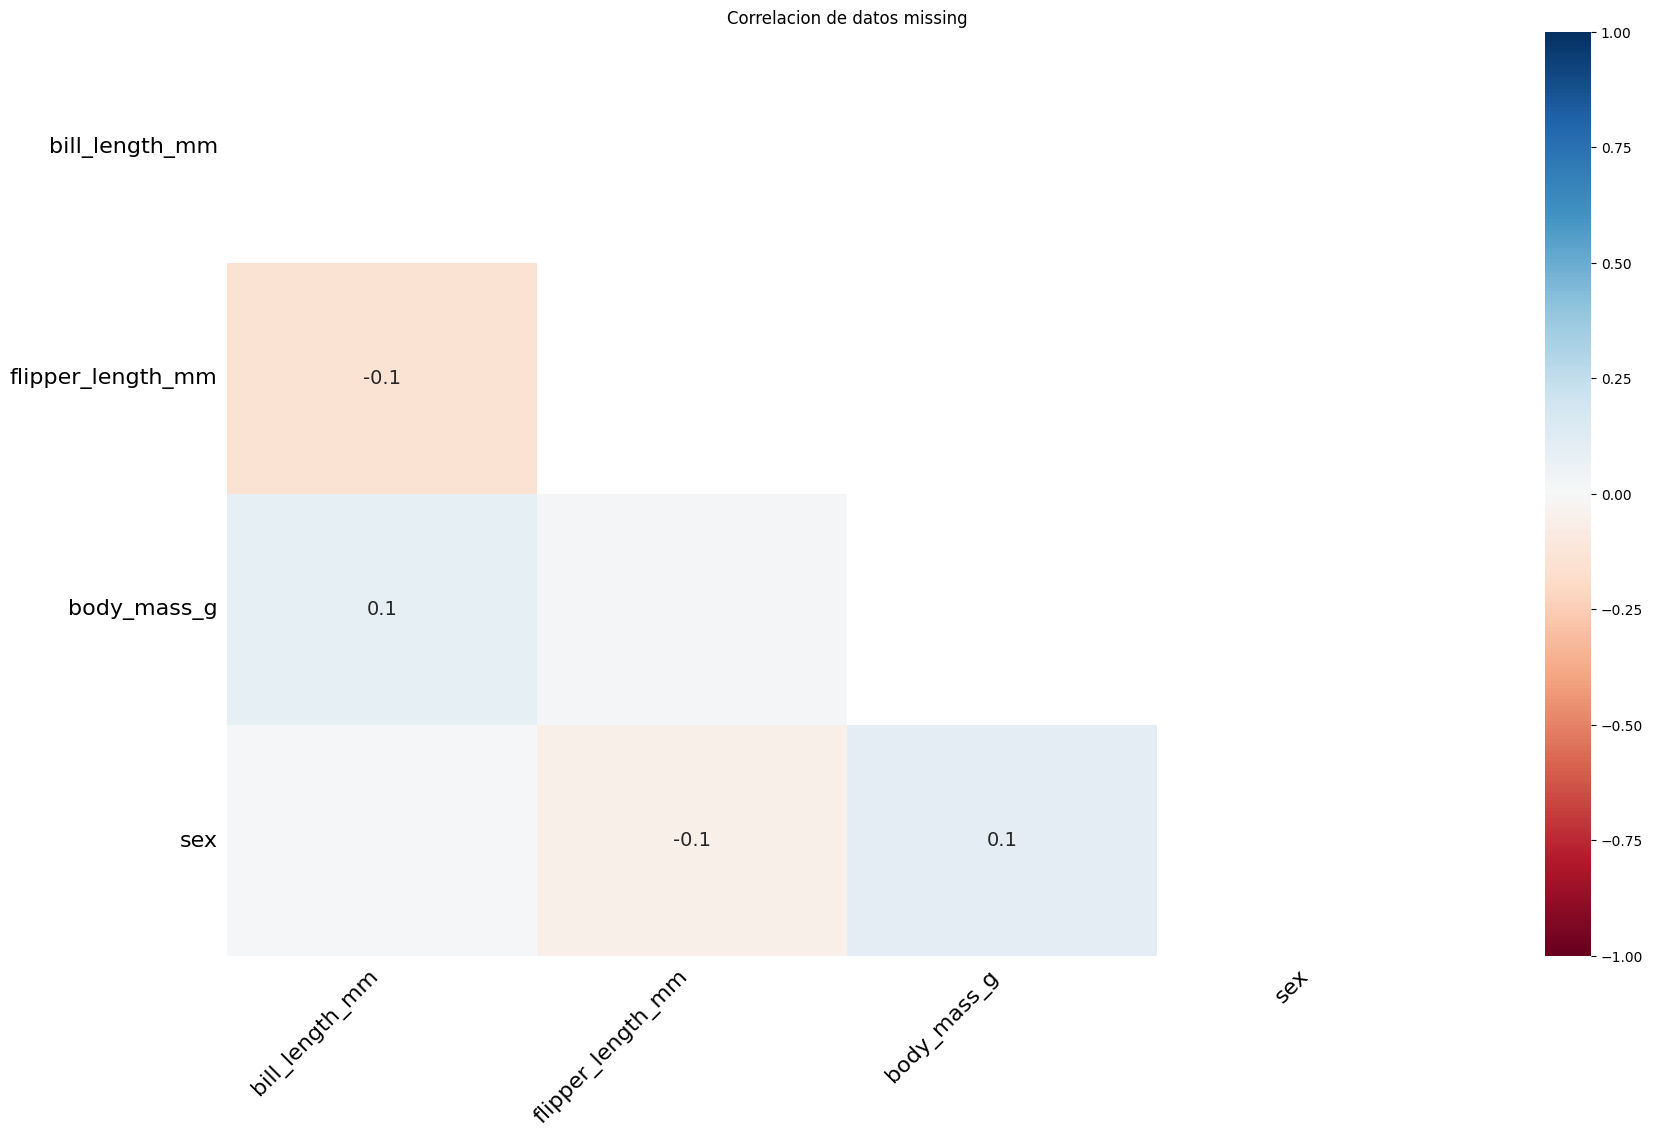

In [8]:
plt.figure(figsize=(10,6))
msno.heatmap(df)
plt.title('Correlacion de datos missing')
plt.show();

# Body_mass_g

In [13]:
print('Analisis de body mass en gramos')
print(f'Media con datos missing(original) {original['body_mass_g'].mean()}')
print(f'Media con datos missing {df['body_mass_g'].dropna().mean()}')

Analisis de body mass en gramos
Media con datos missing(original) 4201.754385964912
Media con datos missing 4179.568106312292


# Flipper_length_mm

In [17]:
print(df.groupby('species')['flipper_length_mm'].apply(lambda x: x.isna().mean() * 100))

species
Adelie       23.84106
Chinstrap     0.00000
Gentoo        0.00000
Name: flipper_length_mm, dtype: float64


In [16]:
print('Analisis de body mass en gramos')
print(f'Media con datos missing(original) {original['flipper_length_mm'].mean()}')
print(f'Media con datos missing {df['flipper_length_mm'].dropna().mean()}')

Analisis de body mass en gramos
Media con datos missing(original) 200.91520467836258
Media con datos missing 202.38235294117646


# bill_length_mm

In [23]:
print(f'media Original de bill_length_mm {original['bill_length_mm'].mean()}')
print(f'Media de bill_length_mm con datos faltantes {df['bill_length_mm'].mean()}')

media Original de bill_length_mm 43.9219298245614
Media de bill_length_mm con datos faltantes 42.80072727272727


# Tratamientos

In [24]:
body_mass_imputed = df['body_mass_g'].fillna(df['body_mass_g'].mean())
flipper_imputed = df.groupby('species')['flipper_length_mm'].transform(lambda x: x.fillna(x.mean()))

from sklearn.impute import  KNNImputer

imputer = KNNImputer(n_neighbors=5)
bill_length_imputed = imputer.fit_transform(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])[:,0]